<a href="https://colab.research.google.com/github/nsundriyal62/SkinSense--AI_Guardian_for_Skin_Health/blob/main/Skin_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dataset_url=r'/content/drive/MyDrive/skin_cancer_detection_using_deeplearning/archive (2)'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, glob

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install numpy

In [ ]:
pip install seaborn

In [ ]:
import seaborn as sns

In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pip install pandas

In [ ]:
import pandas as pd

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import keras

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
from tensorflow.keras.callbacks import Callback,EarlyStopping

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
from sklearn.metrics import  classification_report

In [ ]:
file_path = '/content/drive/MyDrive/skin_cancer_detection_using_deeplearning/archive (2)/train'

In [ ]:
import os

In [ ]:
name_class = os.listdir(file_path)
name_class

['benign', 'malignant']

In [ ]:
import glob

In [ ]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [ ]:
filepaths

['/content/drive/MyDrive/skin_cancer_detection_using_deeplearning/archive (2)/train/benign/1720.jpg',
 '/content/drive/MyDrive/skin_cancer_detection_using_deeplearning/archive (2)/train/benign/1765.jpg',
 '/content/drive/MyDrive/skin_cancer_detection_using_deeplearning/archive (2)/train/benign/1723.jpg',
 '/content/drive/MyDrive/skin_cancer_detection_using_deeplearning/archive (2)/train/benign/1783.jpg',
 '/content/drive/MyDrive/skin_cancer_detection_using_deeplearning/archive (2)/train/benign/170.jpg',
 '/content/drive/MyDrive/skin_cancer_detection_using_deeplearning/archive (2)/train/benign/175.jpg',
 '/content/drive/MyDrive/skin_cancer_detection_using_deeplearning/archive (2)/train/benign/1750.jpg',
 '/content/drive/MyDrive/skin_cancer_detection_using_deeplearning/archive (2)/train/benign/177.jpg',
 '/content/drive/MyDrive/skin_cancer_detection_using_deeplearning/archive (2)/train/benign/1752.jpg',
 '/content/drive/MyDrive/skin_cancer_detection_using_deeplearning/archive (2)/train/b

In [ ]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',

In [ ]:
pip install pandas

In [ ]:
import pandas as pd

In [ ]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/content/drive/MyDrive/skin_cancer_detection_u...,benign
1,/content/drive/MyDrive/skin_cancer_detection_u...,malignant
2,/content/drive/MyDrive/skin_cancer_detection_u...,benign
3,/content/drive/MyDrive/skin_cancer_detection_u...,benign
4,/content/drive/MyDrive/skin_cancer_detection_u...,benign


In [ ]:
#balancing

In [ ]:
import seaborn as sns

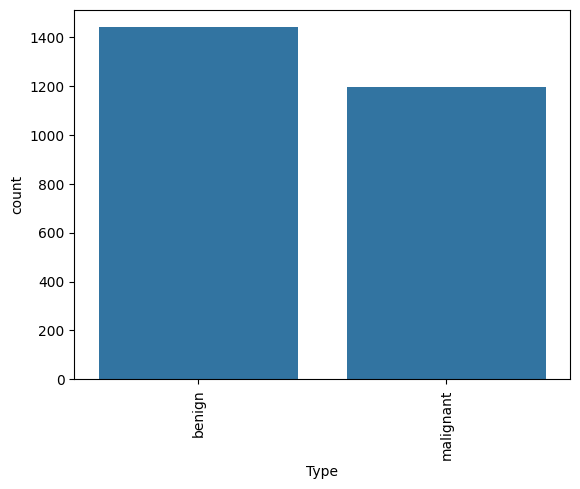

In [ ]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [ ]:
#balance by deleting extra images (Augmentor API)
#augmentation
#GAN

In [ ]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

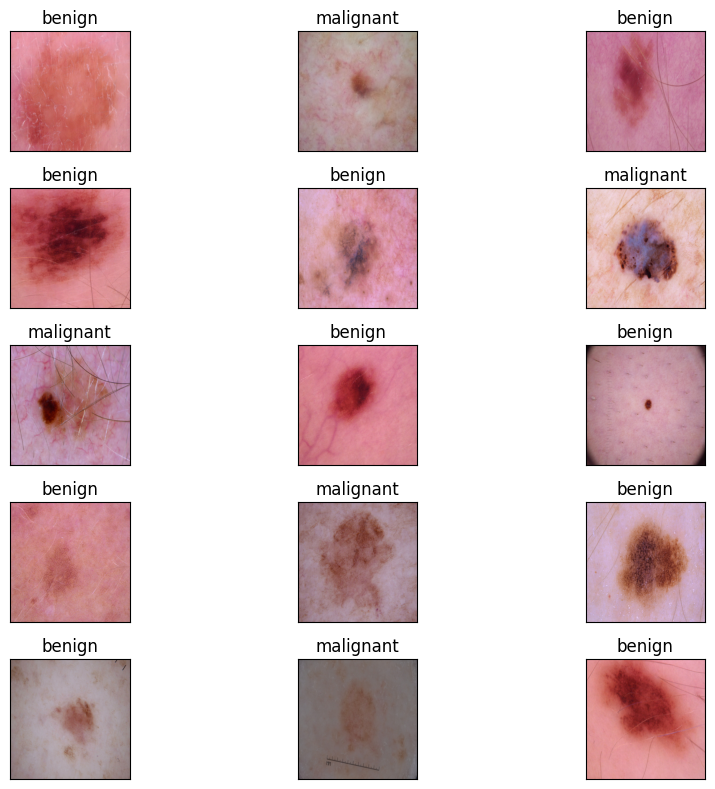

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1977 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.


In [ ]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [ ]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=100
)

Epoch 1/100
62/62 [==============================] - 433s 7s/step - loss: 0.4176 - accuracy: 0.8123 - val_loss: 0.3528 - val_accuracy: 0.8288
Epoch 2/100
62/62 [==============================] - 13s 208ms/step - loss: 0.3165 - accuracy: 0.8574 - val_loss: 0.3259 - val_accuracy: 0.8470
Epoch 3/100
62/62 [==============================] - 13s 208ms/step - loss: 0.2477 - accuracy: 0.8887 - val_loss: 0.3295 - val_accuracy: 0.8485
Epoch 4/100
62/62 [==============================] - 15s 244ms/step - loss: 0.2108 - accuracy: 0.9125 - val_loss: 0.3486 - val_accuracy: 0.8303
Epoch 5/100
62/62 [==============================] - 13s 209ms/step - loss: 0.1859 - accuracy: 0.9221 - val_loss: 0.3525 - val_accuracy: 0.8455
Epoch 6/100
62/62 [==============================] - 13s 208ms/step - loss: 0.1421 - accuracy: 0.9439 - val_loss: 0.3819 - val_accuracy: 0.8364
Epoch 7/100
62/62 [==============================] - 13s 204ms/step - loss: 0.1086 - accuracy: 0.9575 - val_loss: 0.4080 - val_accuracy: 0

In [ ]:
model.save("saved model.h5")

In [ ]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 1.18701
Test Accuracy: 86.21%


In [ ]:
import numpy as np

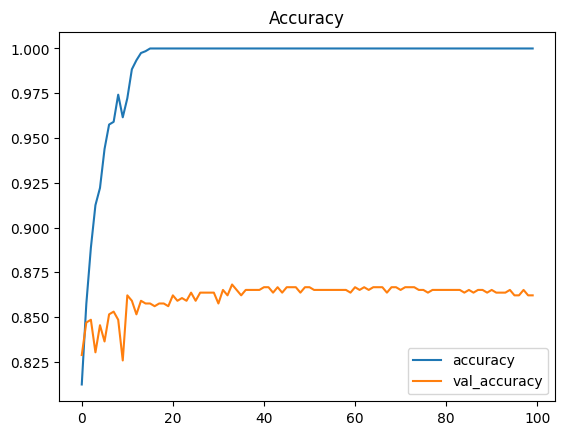

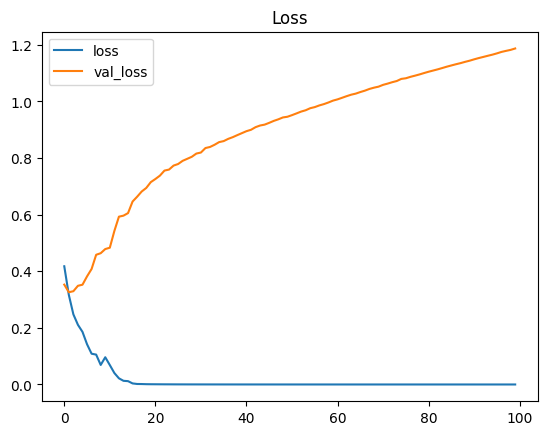

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      benign       0.87      0.87      0.87       347
   malignant       0.86      0.85      0.85       313

    accuracy                           0.86       660
   macro avg       0.86      0.86      0.86       660
weighted avg       0.86      0.86      0.86       660



In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

21/21 [==============================] - 4s 175ms/step


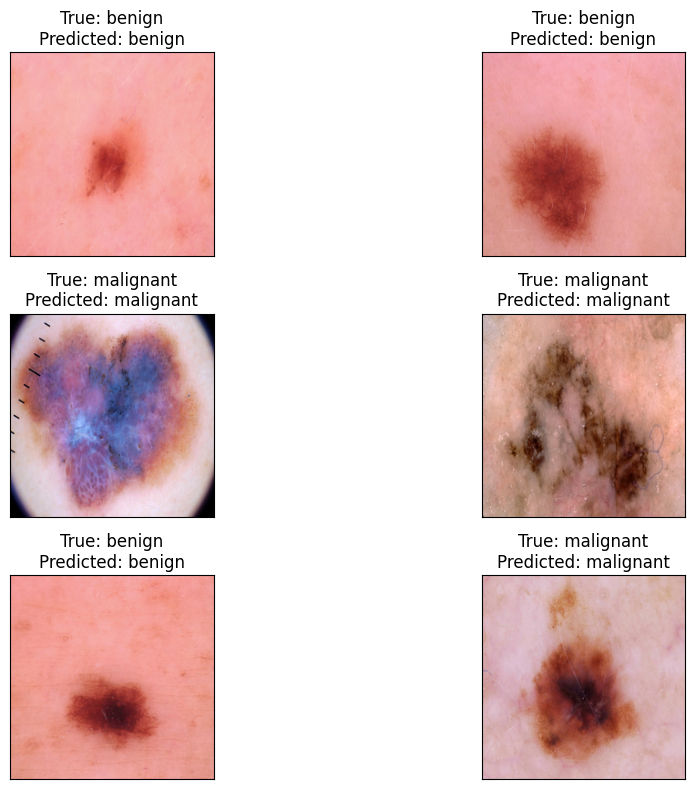

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/saved model.h5')
loaded_model_imageNet = load_model("model_resnet50.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 93ms/step
[[16 83]]


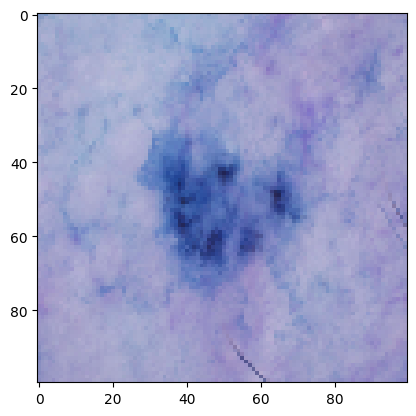

In [ ]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = '/content/drive/MyDrive/skin_cancer_detection_using_deeplearning/archive (2)/test/malignant/1037.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))
plt.imshow(img)


In [ ]:
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[16, 83]


In [ ]:
print("Largest element is:", max(pp))

Largest element is: 83


In [ ]:
index = pp.index(max(pp))

In [ ]:
name_class=['Benign', 'Malignant']

In [ ]:
name_class[index]

'Malignant'

array([[[201, 155, 131],
        [196, 149, 129],
        [200, 159, 137],
        ...,
        [192, 143, 146],
        [193, 145, 145],
        [195, 145, 144]],

       [[195, 147, 124],
        [201, 159, 137],
        [199, 158, 138],
        ...,
        [192, 144, 144],
        [194, 148, 150],
        [190, 145, 140]],

       [[188, 140, 117],
        [198, 156, 134],
        [205, 160, 139],
        ...,
        [196, 147, 150],
        [195, 149, 151],
        [193, 145, 143]],

       ...,

       [[193, 142, 141],
        [194, 142, 146],
        [193, 141, 143],
        ...,
        [195, 145, 148],
        [196, 139, 148],
        [192, 134, 133]],

       [[194, 138, 141],
        [188, 140, 140],
        [193, 145, 145],
        ...,
        [191, 132, 134],
        [192, 131, 138],
        [190, 128, 129]],

       [[191, 135, 134],
        [192, 144, 140],
        [195, 150, 147],
        ...,
        [193, 128, 126],
        [192, 129, 122],
        [192, 130, 131]]], dtype=uint8)
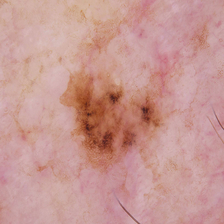

In [ ]:
plt.imread(img_path)

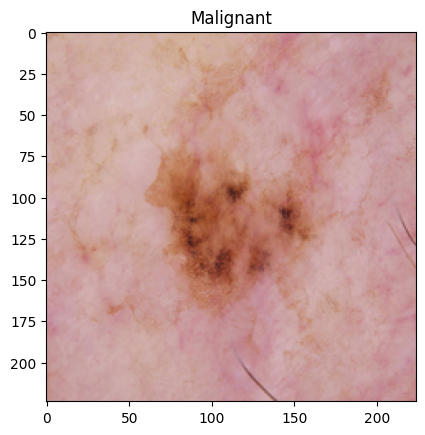

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.title(name_class[index])
plt.show()